# Quick demo of the package

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [17]:
import os 
os.chdir('..')
from fairness.metrics import *
from fairness.approximatemultiwasserstein import MultiWasserStein
from visualization.visualization import viz_fairness_distrib, waterfall_plot, arrow_plot, arrow_plot_permutations, permutations_cols, calculate_perm_wst


## Simulation of the dataset 

In [18]:
# 10 000 observations
# Y : Income
# MSA : Gender, Nb_child

size = 10000

age = np.random.randint(18, 66, size)

gender = np.random.choice(['m', 'w', 'nb'], size)

nb_child = np.random.choice([0,1,2], size)

# Generate incomes regarding gender with Gamma distributions
salaries = []
for g in gender:
    if g == 'm':
        salary = np.random.gamma(20, 0.5)
    elif g == 'w':
        salary = np.random.gamma(2, 2)
    else:
        salary = np.random.gamma(0.5, 6)
    salaries.append(salary)
   
for i, n in enumerate(nb_child):
    if n == 0:
        salaries[i] += np.random.binomial(6, 0.75)
    elif g == 1:
        salaries[i] += np.random.binomial(5, 0.66)
    else:
        salaries[i] += np.random.binomial(1, 0.2)
    

# Creation of the dataframe
df = pd.DataFrame({
    'Age': age,
    'Gender': gender,
    'Nb_child': nb_child,
    'Income': salaries
})

In [19]:
# Creation of the objects useful for the package
x_ssa = df[['Gender','Nb_child']].to_numpy()
y_ssa = df['Income'].to_numpy()
x_ssa_calib, x_ssa_test, y_calib, y_test = train_test_split(x_ssa,y_ssa, test_size=0.3)

## Test the Wasserstein class

### Exact fairness

In [20]:
# Instance of Wasserstein class
wst = MultiWasserStein()
wst.fit(y_calib, x_ssa_calib)
print("y_fair :", wst.transform(y_test, x_ssa_test)) # returns the y_fair

# To have all the steps of sequential fairness, you can return the dictionnary 
print("y_sequentially_fair :", wst.get_sequential_fairness())

y_fair : [ 4.4852921   4.39521642 10.26016633 ...  4.55342405  6.87372646
  5.16063343]
y_sequentially_fair : {'Base model': array([0.16071731, 7.76487581, 6.90185498, ..., 5.52959894, 3.8312975 ,
       5.25172342]), 'sens_var_1': array([3.16154934, 3.14107152, 8.56123699, ..., 7.23616478, 5.41453295,
       7.96216326]), 'sens_var_2': array([ 4.4852921 ,  4.39521642, 10.26016633, ...,  4.55342405,
        6.87372646,  5.16063343])}


### Approximate fairness

In [25]:
# Instance of Wasserstein class with approximate fairness
approx_wst = MultiWasserStein()
approx_wst.fit(y_calib, x_ssa_calib)
y_fair = approx_wst.transform(y_test, x_ssa_test, epsilon = [0.1, 0.2])
print("y_fair :", y_fair) # returns the y_fair

# To have all the steps of sequential fairness, you can return the dictionnary 
y_fair_dict = approx_wst.get_sequential_fairness()
print("y_sequentially_fair :", y_fair_dict)

y_fair : [3.95594935 4.65786221 9.75060782 ... 4.93681909 6.41556523 5.46840015]
y_sequentially_fair : {'Base model': array([0.16071731, 7.76487581, 6.90185498, ..., 5.52959894, 3.8312975 ,
       5.25172342]), 'sens_var_1': array([2.86142721, 3.60348531, 8.39527204, ..., 7.06552812, 5.25622671,
       7.6911444 ]), 'sens_var_2': array([3.95594935, 4.65786221, 9.75060782, ..., 4.93681909, 6.41556523,
       5.46840015])}


## Useful metrics

In [26]:
print("Final unfairness :", unfairness(y_fair, x_ssa_test))
print("Sequential unfairness :", unfairness_multi(y_fair_dict, x_ssa_test))
print("Final fairness for all permutations :", unfairness_multi_permutations(calculate_perm_wst(y_calib, x_ssa_calib, y_test, x_ssa_test), permutations_cols(x_ssa_test)))

Final unfairness : 3.5794310562568867
Sequential unfairness : {'sens_var_0': 9.25946643024017, 'sens_var_1': 3.7618472982200566, 'sens_var_2': 3.5794310562568867}


AttributeError: 'MultiWasserStein' object has no attribute 'get_sequential_fairnsess'

## Test the visualization folder

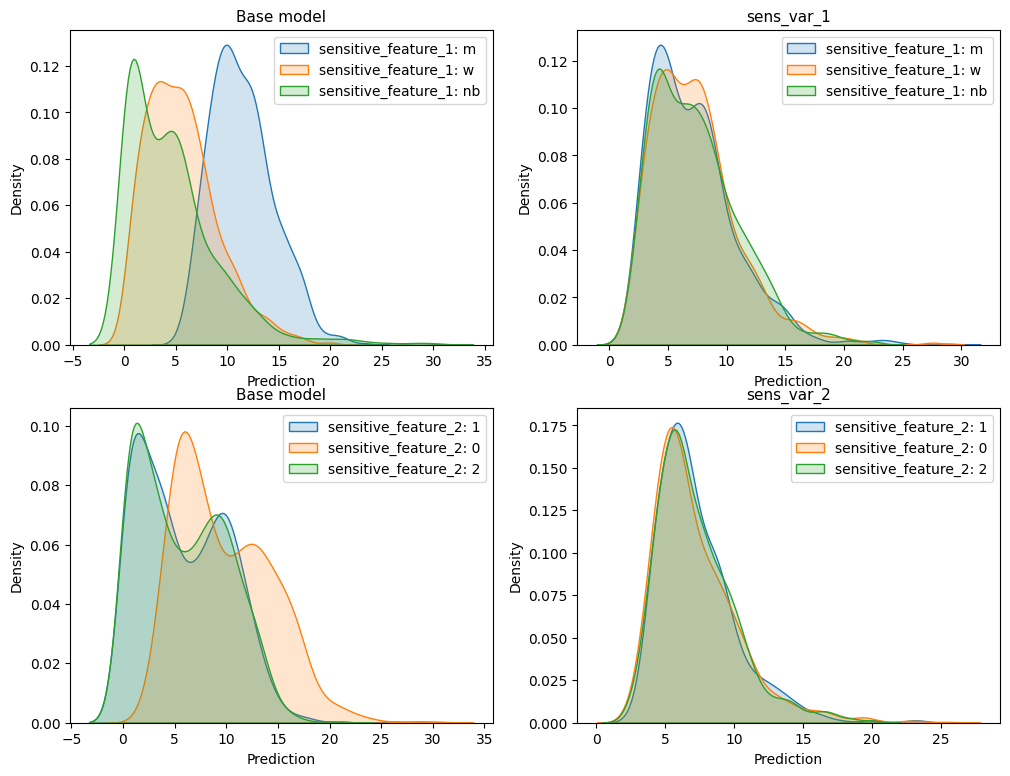

In [14]:
# Visualization of densities before and after exact fairness
viz_fairness_distrib(wst.y_fair_test, x_ssa_test)

## Useful metrics